## Project Python Foundations: FoodHub Data Analysis

# Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

# Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

# Data Dictionary
* order_id: Unique ID of the order

* customer_id: ID of the customer who ordered the food

* restaurant_name: Name of the restaurant

* cuisine_type: Cuisine ordered by the customer

* cost: Cost of the order

* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

* rating: Rating given by the customer out of 5

* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [3]:
df.shape

(1898, 9)

# Observations:
* There are 1898 rows and 9 columns in this DataFrame.

In [4]:
# Use info() to print a concise summary of the DataFrame. This will also display the data types of each columns for this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# Observations:
The following datatypes are seen: Order_id, customer_id, food_preparation_time and delivery_time are integers. Restaurant_name, cuisine_type, day_of_the_week and rating are objects (strings). Cost_of_the_order is a float (decimal). All the columns have 1898 observations, which inferrs that there are no null values present in the dataset.

# Question 3: Are there any missing values in the data?

In [5]:
# Rating displayed as an object, so this will explain why that column has an object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [6]:
# Checking the count of different data type in Rating column
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [7]:
# Create new DataFrame 'df_rated' which contains only the rows where the 'rating' column is not equal to 'Not given' 
df_rated = df[df['rating'] != 'Not given']

In [8]:
# Change the data type to int
df['rating'] = df_rated['rating'].astype('int')

In [9]:
# Convert 'restaurant_name', 'cuisine_type' and 'day_of_the_week' to 'category' data type
df['restaurant_name'] = df.restaurant_name.astype('category') 
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')

In [10]:
# Count the number of missing values in each column.
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [11]:
# Get the statistical summary for the dataset
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [12]:
# Generate summary statistics for'food_preparation_time' which helps to understand the data's distribution
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [13]:
# Checking for missing values in the 'rating'
df['rating'].isnull().sum()

736

In [14]:
# Calculate the mean rating for each cuisine type
df.groupby(['cuisine_type'])[['rating']].mean()

,rating
cuisine_type,
American,4.298913
Chinese,4.338346
French,4.300000
Indian,4.540000
Italian,4.360465
Japanese,4.373626
Korean,4.111111
Mediterranean,4.218750
Mexican,4.416667


In [15]:
# Display the first 5 rows 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [16]:
# Confirming there are no missing values in 'rating' column
df['rating'].isnull().sum()

736

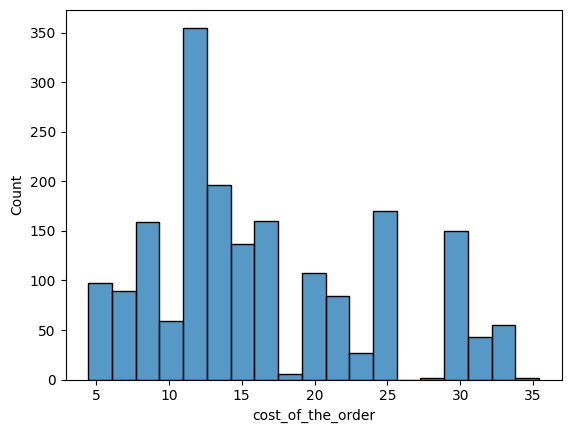

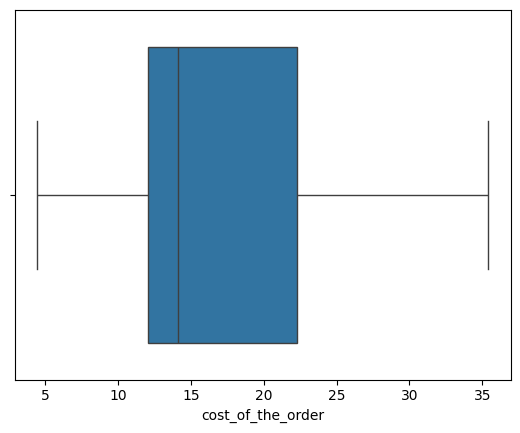

In [17]:
# Display histogram and box plot for 'cost_of_the_order'
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

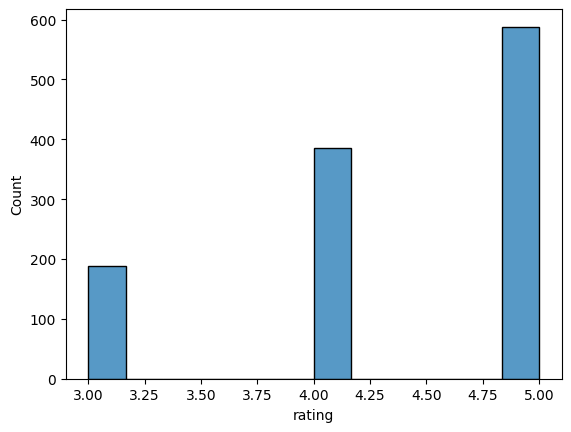

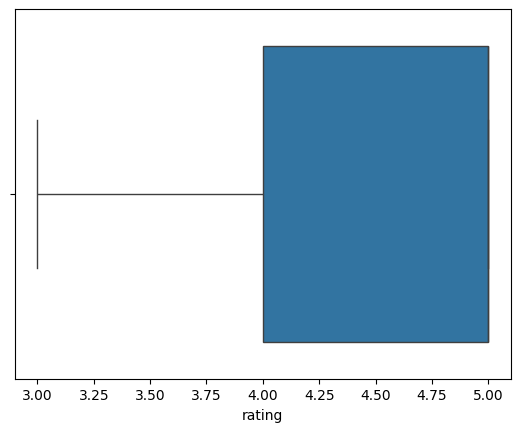

In [18]:
# Display histogram and box plot for 'rating'
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

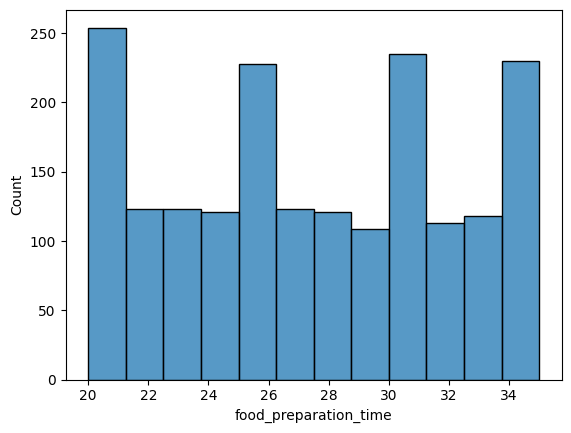

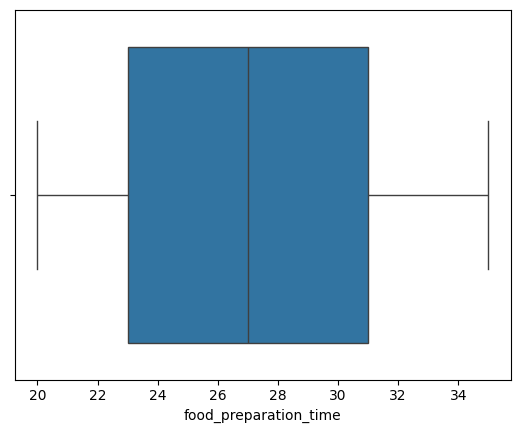

In [19]:
# Display histogram and box plot for 'food_preparation_time'
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

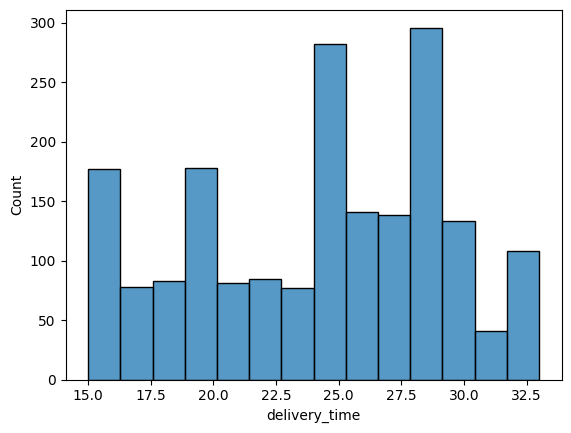

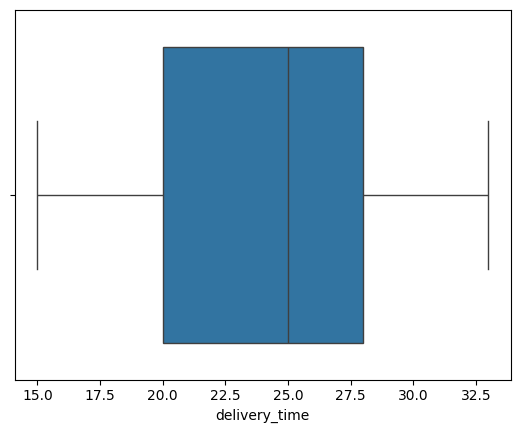

In [20]:
# Display histogram and box plot for 'delivery_time'
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

# Let's explore the Categorical columns

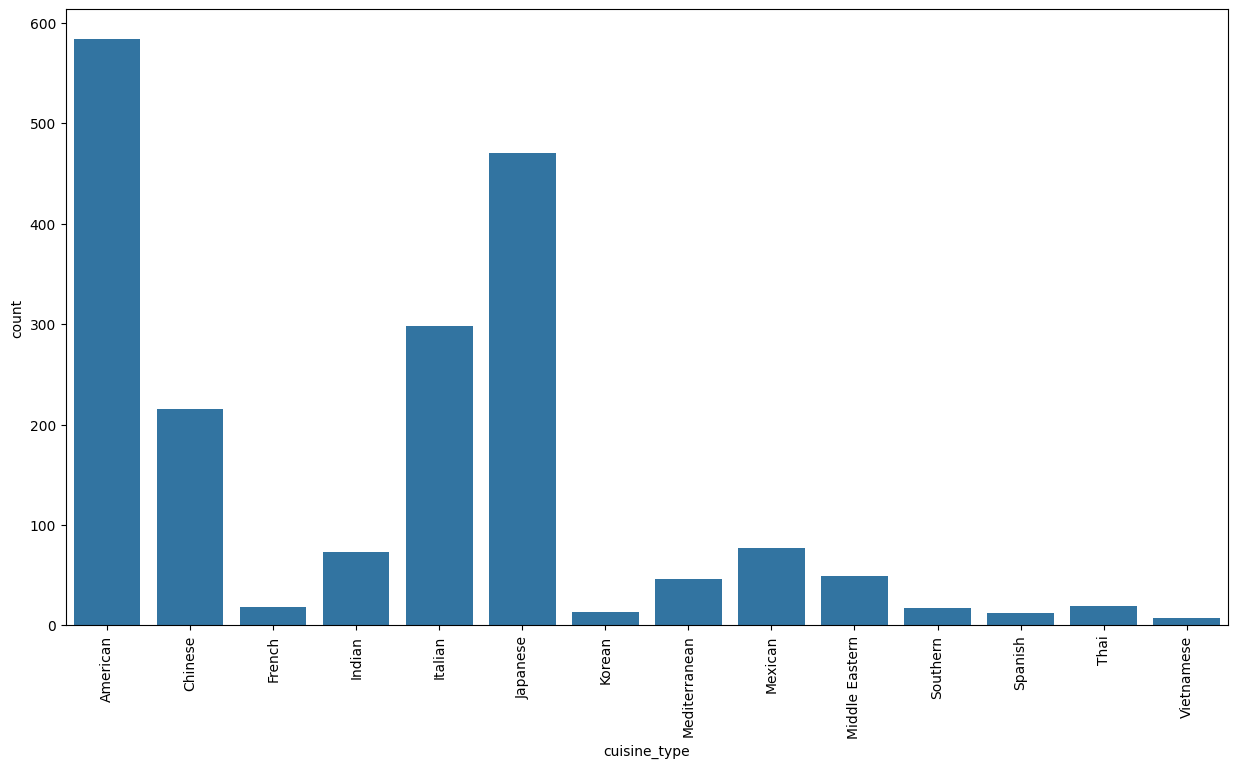

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

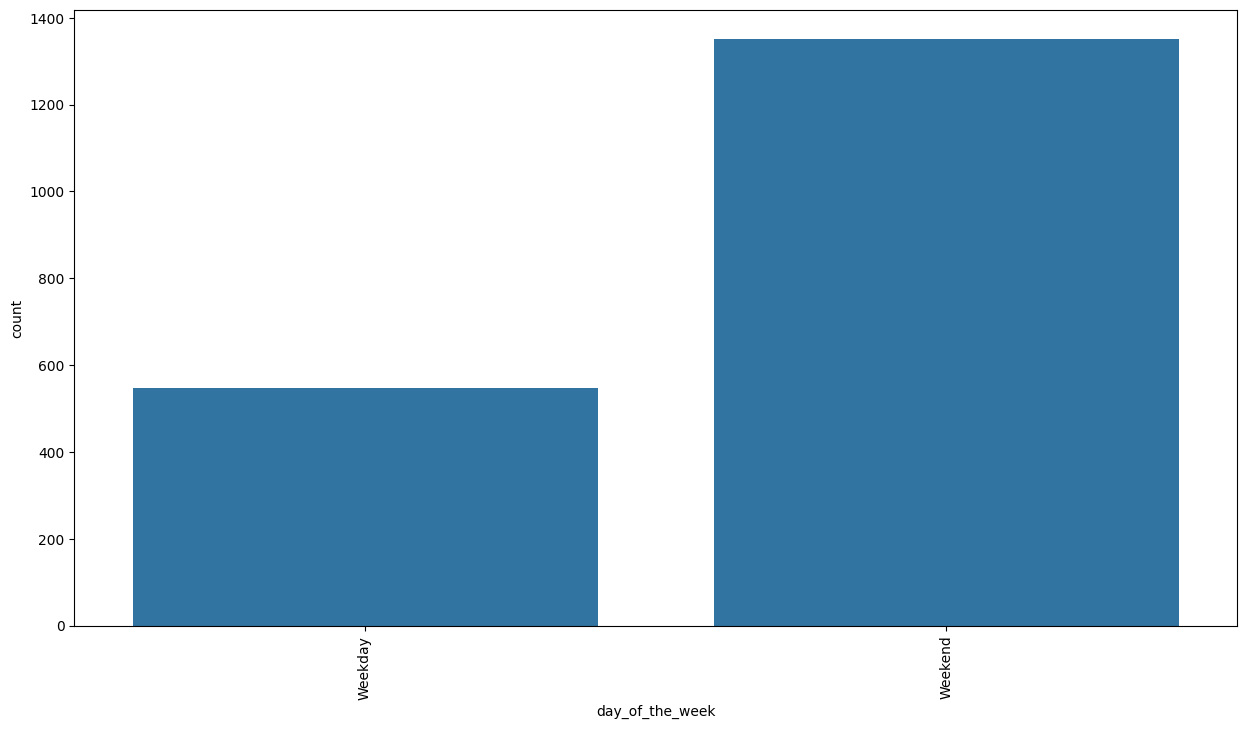

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='day_of_the_week')
plt.xticks(rotation=90);

In [23]:
# Calculate number of occurrences of each restaurant name then sort in desc which displays highest count at top
topRestaurants = df['restaurant_name'].value_counts().sort_values(ascending=False)
# Display first five top restaurants
topRestaurants.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [24]:
# Display names of most popular cuisine types on weekends and number of times each cuisine appears
popularCuisineWeekend = df.groupby(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'])['cuisine_type'].count().sort_values(ascending=False);
popularCuisineWeekend.head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [25]:
# Filter 'cost_of_the_order' to include values greater than 20. Then count total number of values in the cost_of_the_order and multiply by 100 to convert to percentage
round(df['cost_of_the_order'][df['cost_of_the_order'] > 20].count() / df['cost_of_the_order'].count()  * 100)

29

In [26]:
# Calculate the average delivery time for orders in the DataFrame
df['delivery_time'].mean()

24.161749209694417

In [27]:
# Identify and display top customers based on number of orders
topCustomers = df.groupby(['customer_id'])[['customer_id','order_id']].count().sort_values(by = 'order_id', ascending=False)
topCustomers.head()

,customer_id,order_id
customer_id,,
52832,13,13
47440,10,10
83287,9,9
250494,8,8
65009,7,7


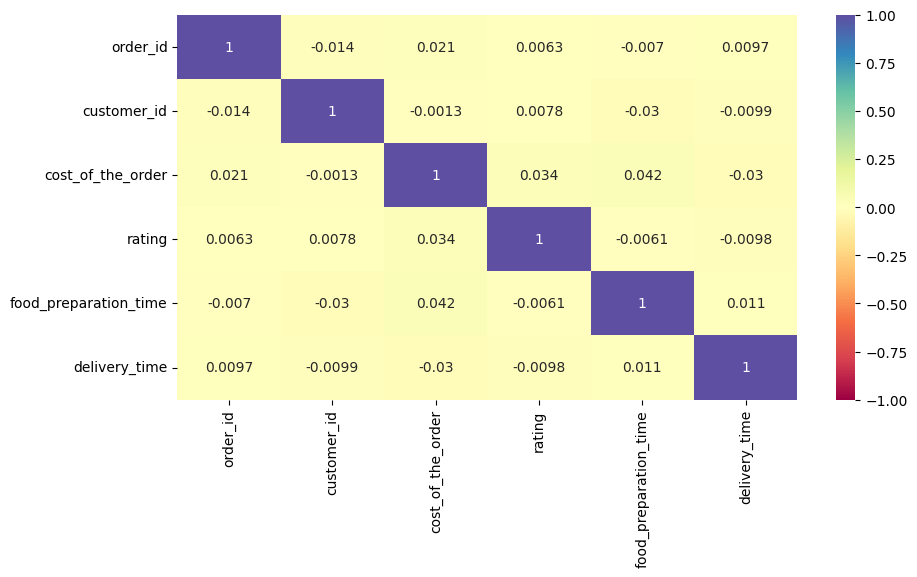

In [28]:
#  Multivariate Analysis
plt.figure(figsize=(10,5))
sns.heatmap( df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

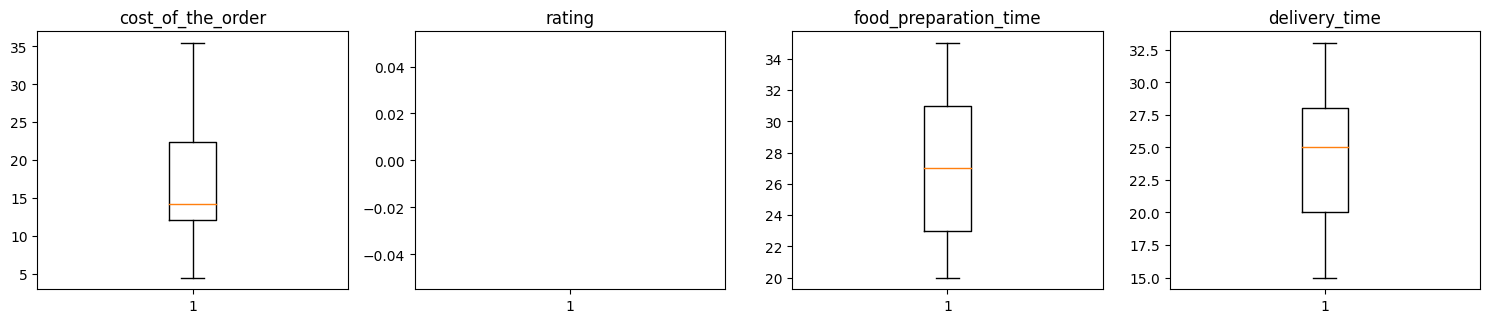

In [29]:
# Outlier detection using boxplot
# Selecting the numerical columns of data and addign their names in a list
numeric_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

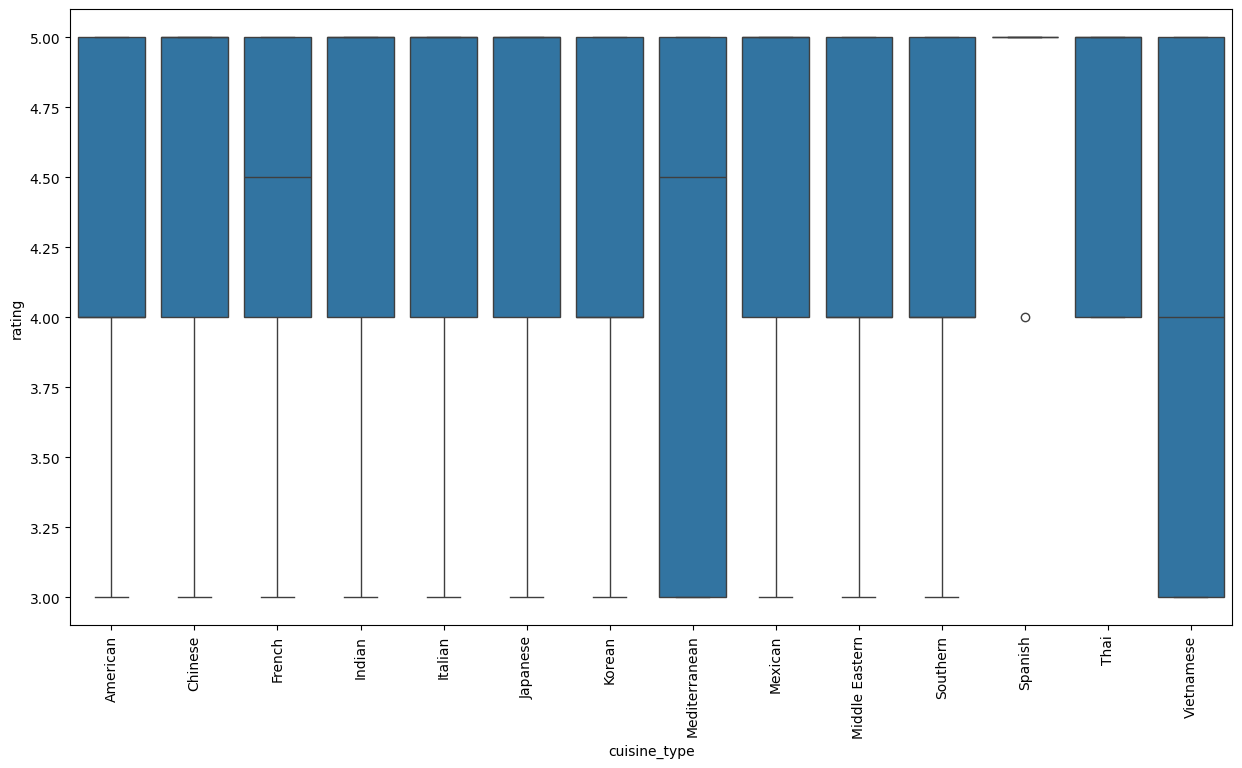

In [30]:
# Create boxplot
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='rating')
plt.xticks(rotation=90);

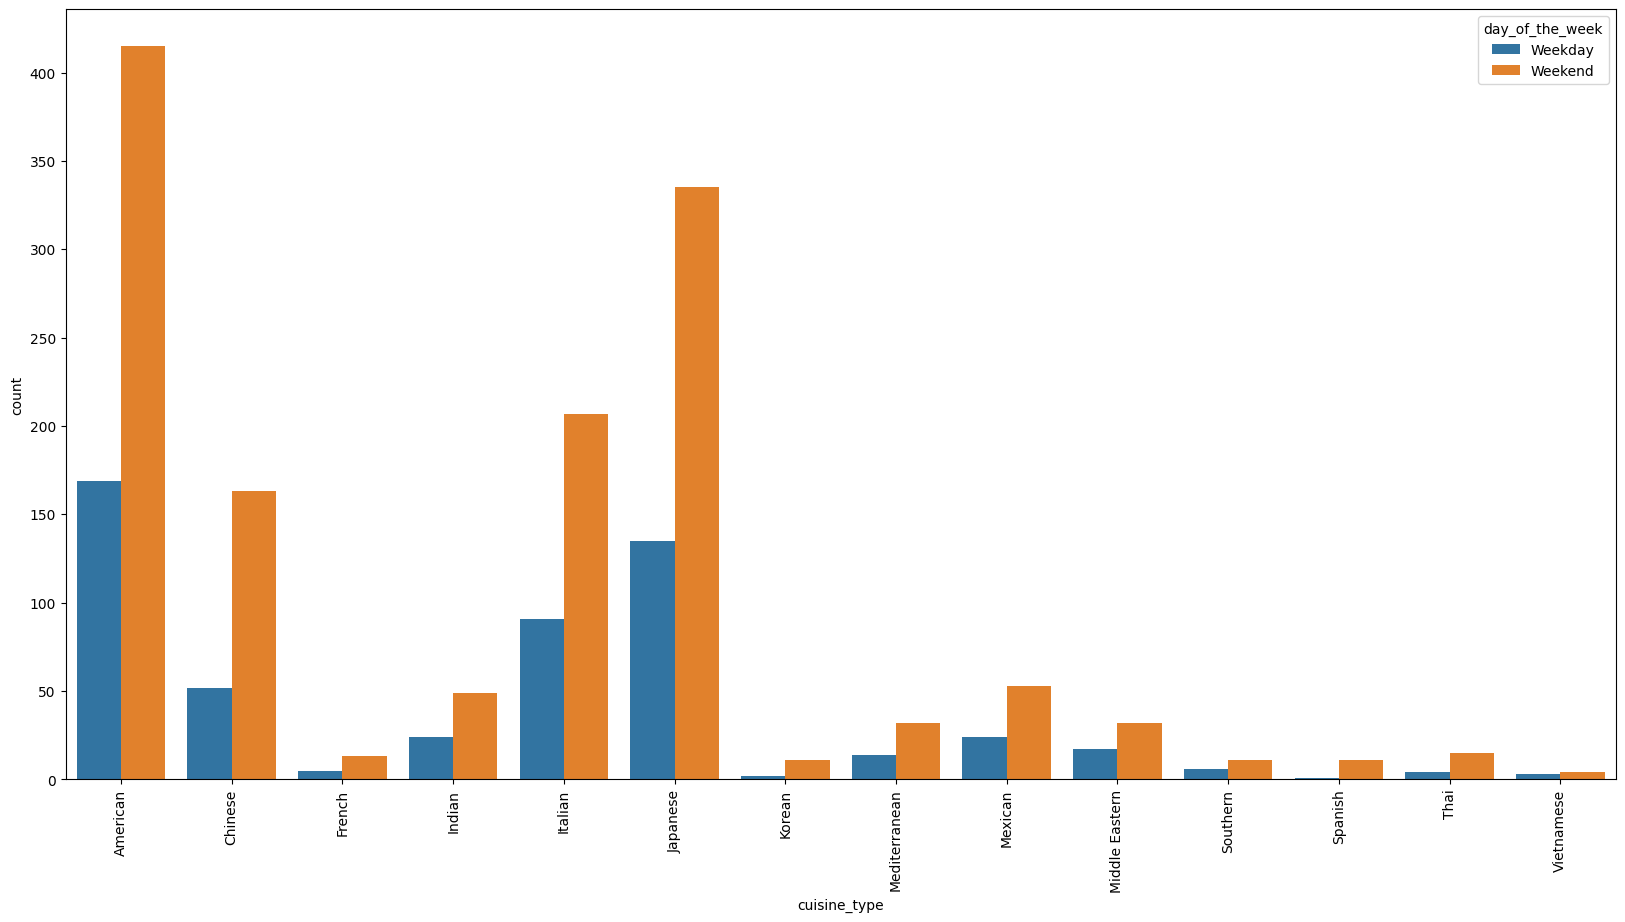

In [31]:
# Create countplot to visualize
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

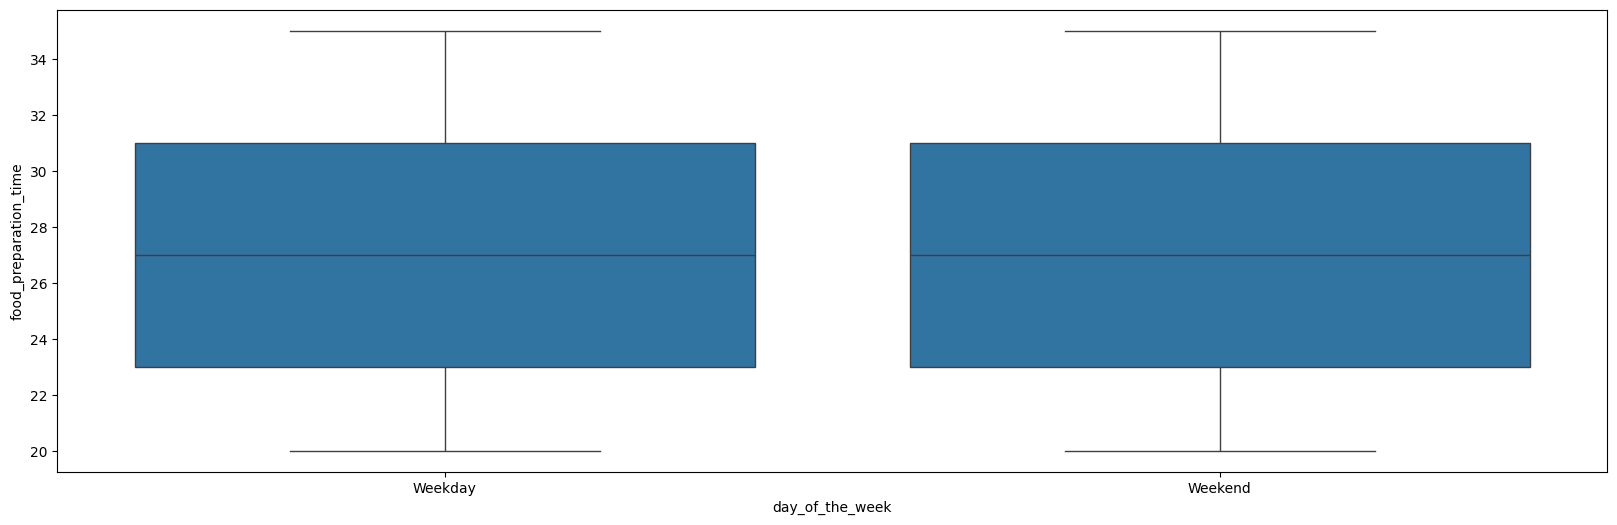

In [32]:
# Create boxplot to display distribution of 'food_preparation_time' 
plt.figure(figsize=(20,6))
sns.boxplot(data=df,x='day_of_the_week', y='food_preparation_time')
plt.show()

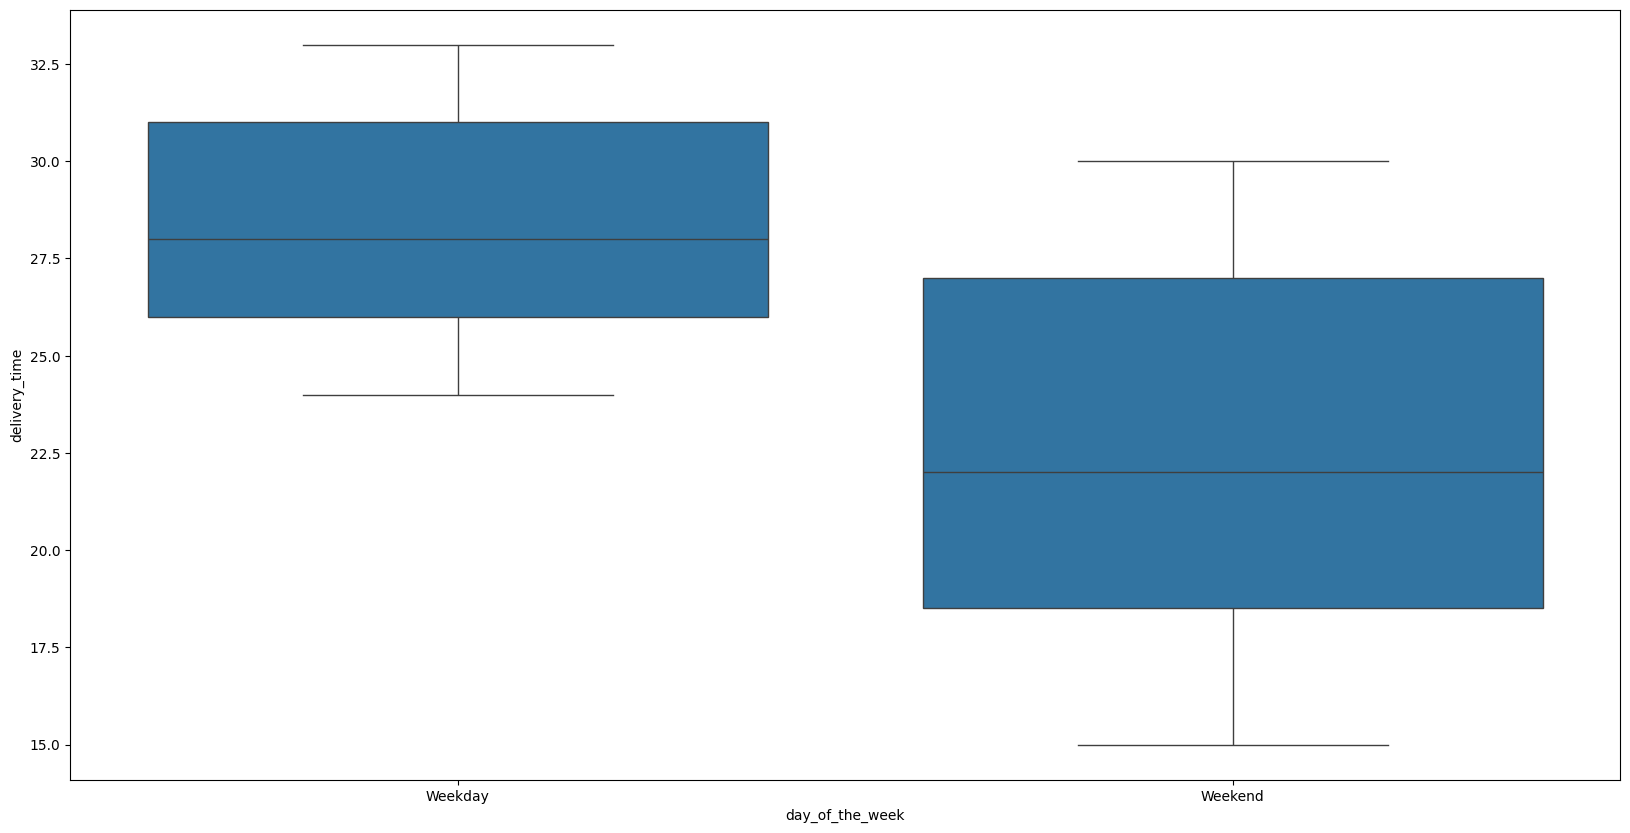

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='day_of_the_week', y='delivery_time')
plt.show()

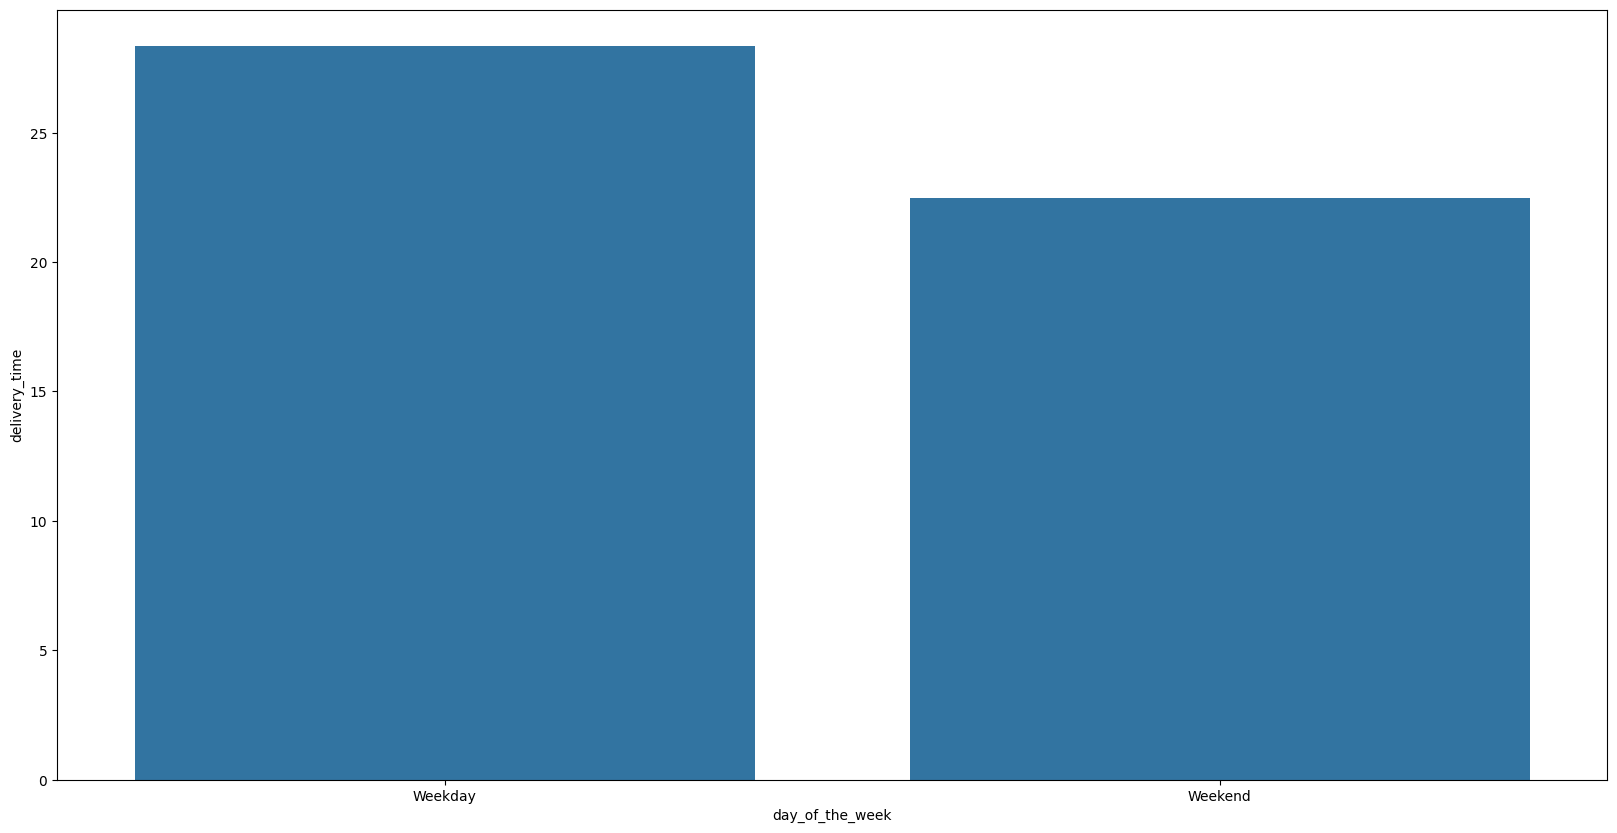

In [34]:
# Create barplot to see the average delivery time across different days of the week with disabling the display of confidence intervals
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='day_of_the_week', y='delivery_time', errorbar=('ci', False))
plt.show()

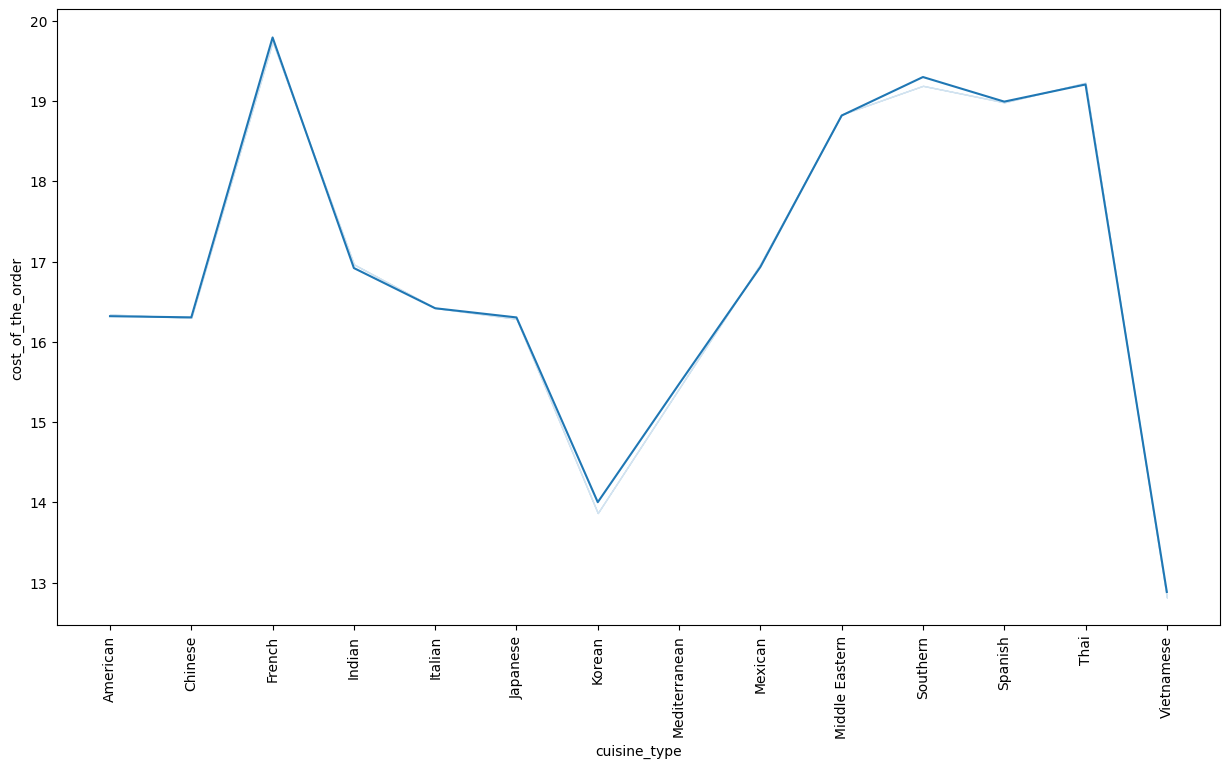

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', errorbar=('ci', False))
plt.xticks(rotation=90);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 102.7 KB


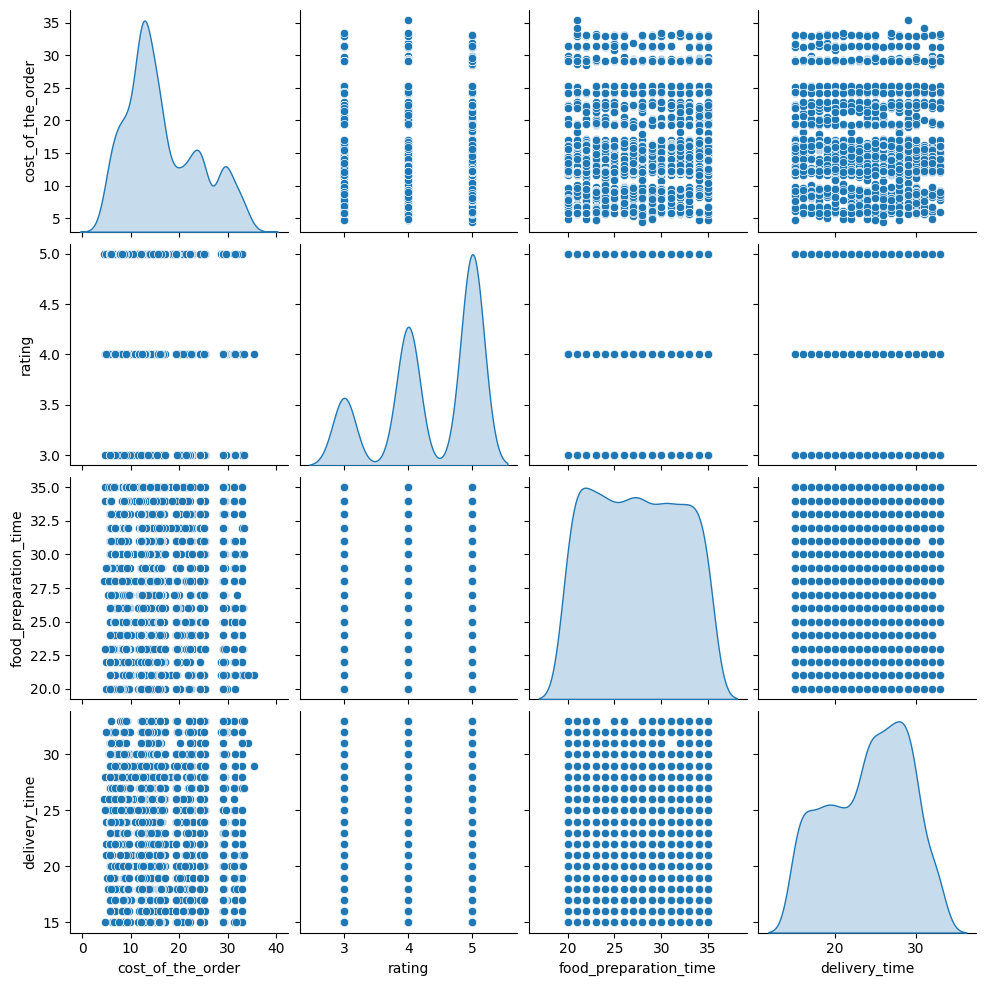

In [36]:
# Display basic information for DataFrame
df.info()
# Define numeric variables to use in the pairplot
num_var = ['cost_of_the_order','rating','food_preparation_time','delivery_time']
# Calculate correlation for the numeric variables
corr = df[num_var].corr()
# Create pairplot for the numeric variables with KDE 
sns.pairplot(data=df[num_var], diag_kind="kde")
# Display pairplot
plt.show()

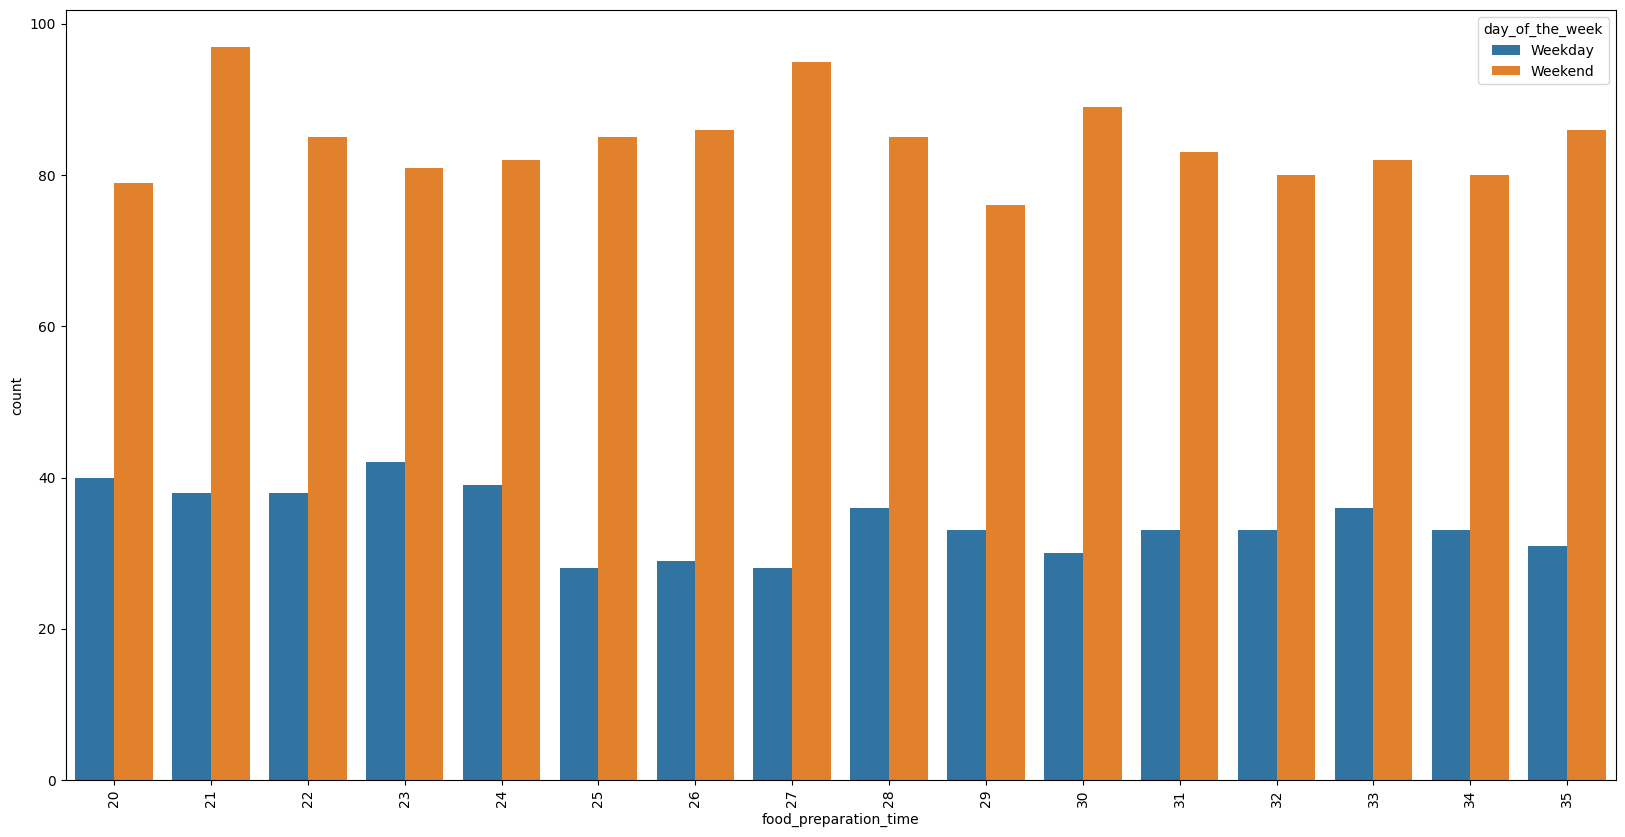

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='food_preparation_time', hue='day_of_the_week')
plt.xticks(rotation=90);

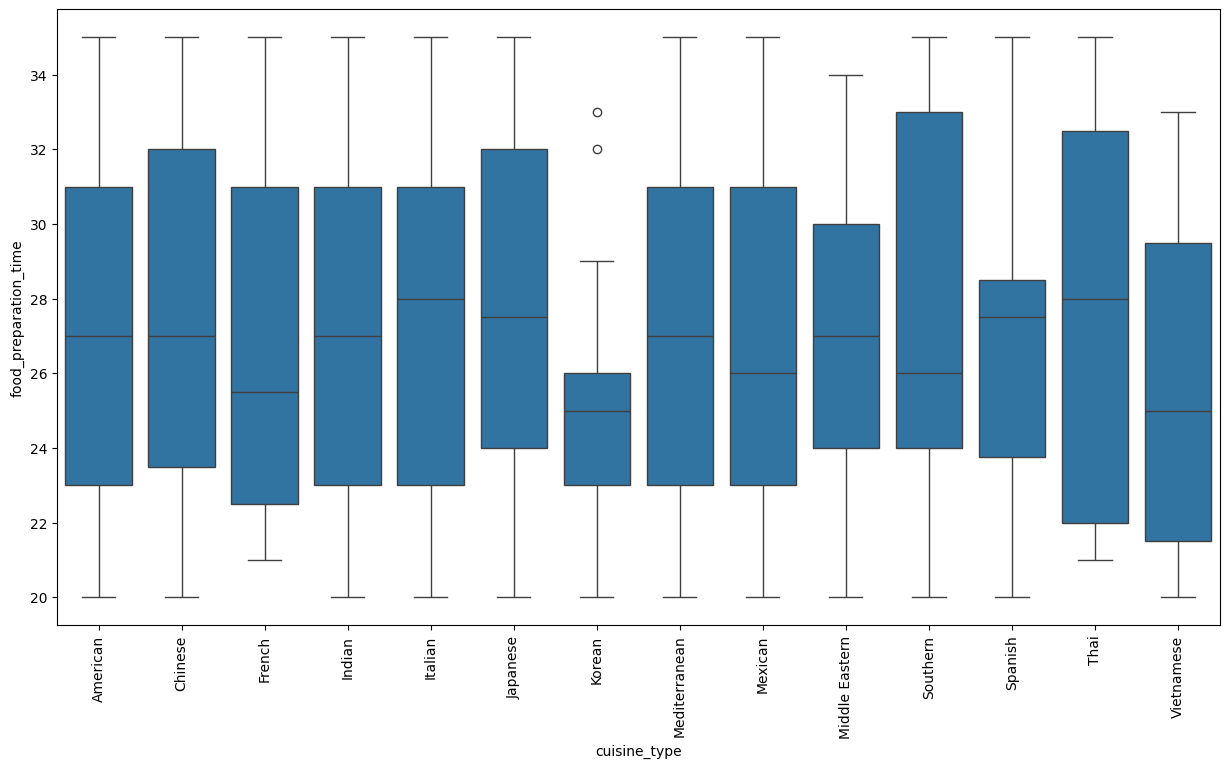

In [39]:
# Create boxplot
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

# Observation:
* Southern cuisine type takes more time to prepare
* 25% of Vietnamese orders take the least preparation time

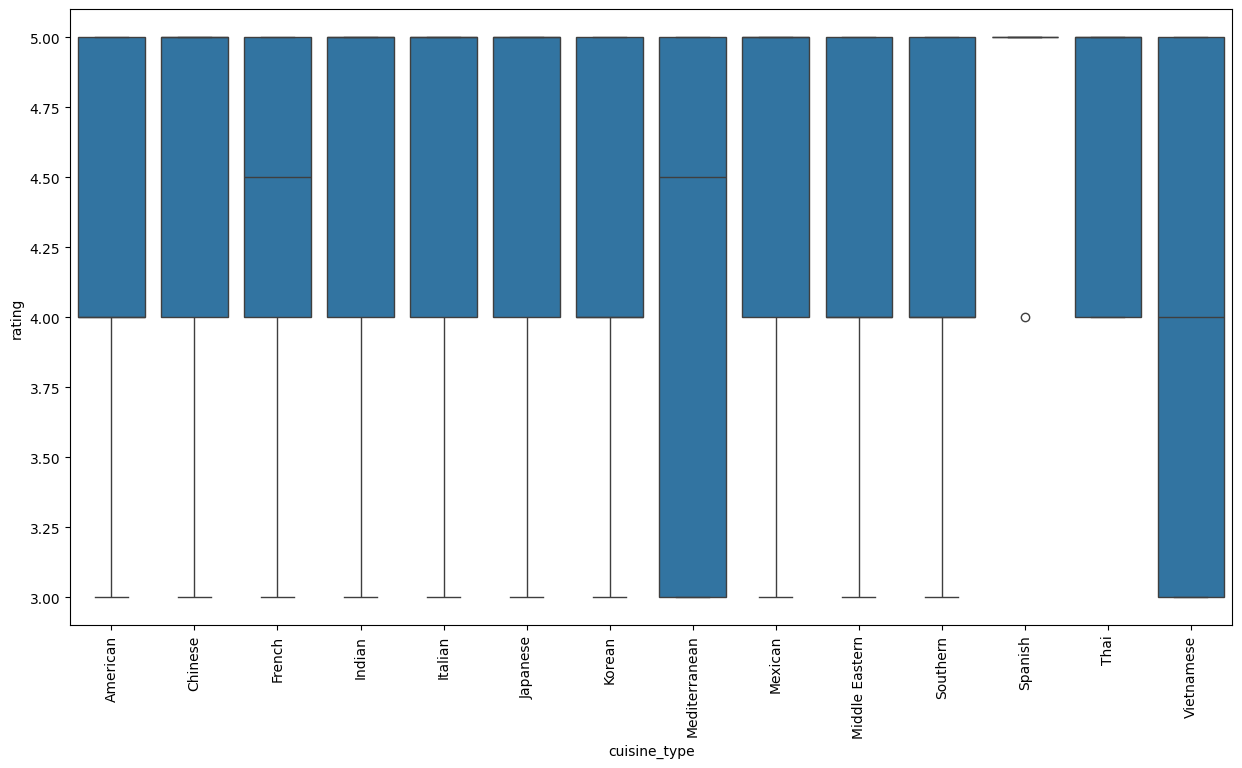

In [40]:
# Create boxplot
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='rating')
plt.xticks(rotation=90);

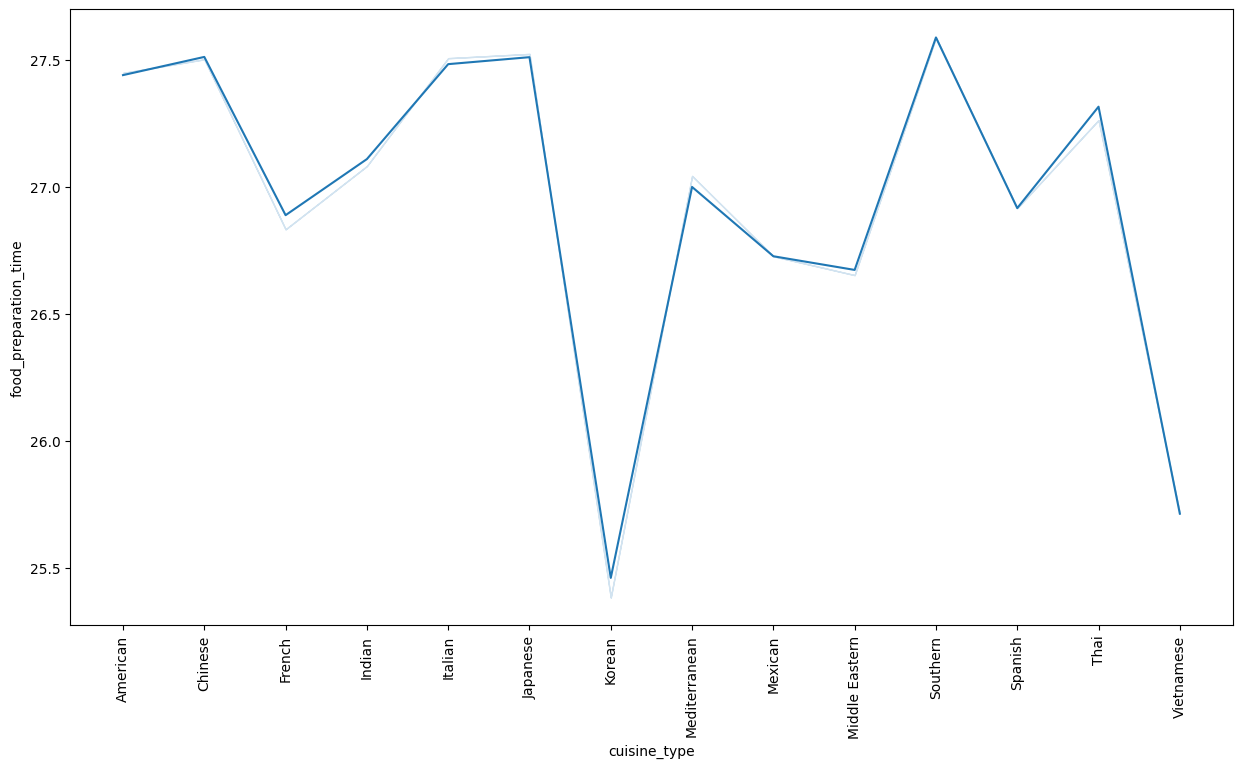

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', errorbar=('ci', False))
plt.xticks(rotation=90);

In [42]:
# Create copy of original DataFrame
df_rated = df.copy()
# Group 'df_rated' by restaurant name and calculate count of ratings for each restaurant. Then sort the results in desc order based on rating count and reset index to create new DataFrame
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# Find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'].cat.remove_unused_categories())['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [43]:
# Initialize 'revenue'
revenue = 0
# For loop to iterate through cost_of_the_order assigning value to variable 'cost'
for cost in df['cost_of_the_order']:
    # if cost is greater than 20, company earns 25% as revenue
    if (cost > 20):
        revenue = revenue + (cost*0.25)
    # if cost is between 5 and 20, the company earns 15% of the cost as revenue   
    elif (5 < cost < 20):
        revenue = revenue + (cost*0.15)
    # if cost is less than or equal to 5, the company earns no revenue from that order
    else:
        revenue = revenue + (cost*0)
# print total net revenue generated by company across all orders with two decimal places
print('The net revenue generated by the company across all orders is:', "{:.2f}".format(revenue))

The net revenue generated by the company across all orders is: 6166.30


## Conclusion and Recommendations

 ## What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

Most popular cuisine type is American and least popular is Vietnamese. Top five restaurants are Shake Shack (American), The Meatball Shop (Italian), Blue Ribbon Sushi (Japanese), Blue Ribbon Fried Chicken (American) and Parm (Italian). Average order delivery time is 24.16 min Majority of the orders are placed on the weekend Delivery time is between 15-33 mins. Food preparation time is between 20-35 min with Southern taking the longest to prepare Customers are likely to rate more on the weekend 736 orders had no rating Weekends has longer food preparation time, almost doubled. American is the most popular on the weekends and weekdays Least popular on weekdays is Spanish and least popular on the weekends is Vietnamese Vietnamese has the lowest rating around 25%

# Recommendations:

Come up with incentives to customers to give ratings like promotions or reminder emails/text Vietnamese has the lowest rating and cost of order. Look into the Vietnamese restaurants to find ways to improve quality Weekends has longer food preparation time so invest in staff over weekend on popular cuisine type